#Business Understanding

Dalam proses digitalisasi yang semakin kompleks, kasus pencemaran nama baik secara online semakin marak ditemukan. Kasus ini berdampak pada citra atau reputasi seseorang ataupun entitas. Selain itu, dari aspek psikologis pencemaran nama baik juga berdampak pada kesehatan mental, rasa percaya diri, dan kualitas hidup seseorang yang menjadi sasaran. Dari Aspek bisnis, pencemaran nama baik juga dapat merusak reputasi dan menurunkan kepercayaan pelanggan. Oleh karena itu, penelitian sistem klasifikasi sentimen untuk analisis pencemaran nama baik menjadi relevan untuk dilakukan dalam dunia digital yang terus berkembang.

#Data Understanding

Data yang digunakan dalam project ini adalah data hasil crawling dari postingan di beberapa media sosial seperti instagram, twitter, dan kaskus yang mengandung pencemaran nama baik. Data ini dapat diakses melalui repositori github berikut: https://github.com/ahmadizzan/netifier/tree/master/data/raw . Dataset berisi 6995 baris yang mengandung 4 kategori kalimat toxic, yaitu pornografi, SARA, radikalisme, dan pencemaran nama baik. Namun, dalam project ini hanya mengambil data pada kolom 'original_text' dan 'pencemaran_nama_baik' sesuai dengan kebutuhan yang ada.

#Data Preparation

Import Library yang dibutuhkan

In [1]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import itertools
import nltk
import pickle

In [2]:
url_train = 'https://raw.githubusercontent.com/ahmadizzan/netifier/master/data/raw/train.csv'
response = requests.get(url_train)
data_train = pd.read_csv(io.StringIO(response.text))
data_train = data_train[["original_text", "pencemaran_nama_baik"]]
data_train.head()

,original_text,pencemaran_nama_baik
0,[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e...,1
1,"@verosvante kita2 aja nitizen yang pada kepo,t...",0
2,"""#SidangAhok smg sipenista agama n ateknya mat...",1
3,@bolususulembang.jkt barusan baca undang2 ini....,0
4,bikin anak mulu lu nof \nkaga mikir apa kasian...,0


In [3]:
data_train.shape

(6995, 2)

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6995 entries, 0 to 6994
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   original_text         6995 non-null   object
 1   pencemaran_nama_baik  6995 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 109.4+ KB


In [5]:
#Mengubah tipe data pada kolom target (pencemaran_nama_baik) menjadi kolom kategori agar dapat divisualisasikan distribusi kelasnya pada bar chat

data_train['pencemaran_nama_baik'].astype('category')

0       1
1       0
2       1
3       0
4       0
       ..
6990    0
6991    0
6992    0
6993    1
6994    1
Name: pencemaran_nama_baik, Length: 6995, dtype: category
Categories (2, int64): [0, 1]

<function matplotlib.pyplot.show(close=None, block=None)>

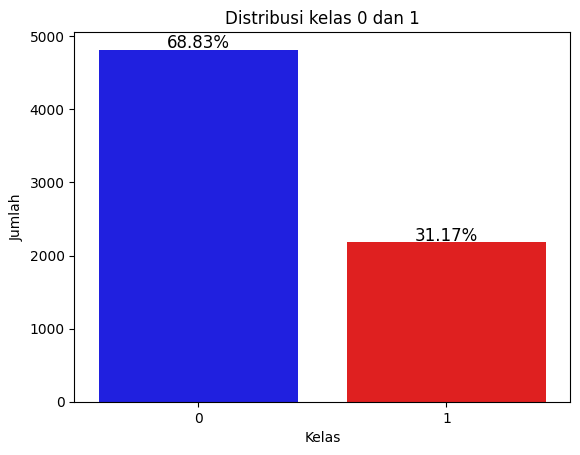

In [6]:
#Membuat visualisasi distribusi kelas pada kolom target untuk identifikasi apakah data terdapat imbalance kelas

class_distribution = data_train['pencemaran_nama_baik'].value_counts()
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=["blue", "red"])

plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Distribusi kelas 0 dan 1')

for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(data_train) * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show

Dari hasil visualisasi di atas, terdapat imbalance class dengan kelas 1 menjadi kelas minoritas. Agar kelas menjadi balance, maka dilakukan undersampling terhadap data mayoritas (kelas 0). Teknik undersampling ini dipilih dengan melihat perbandingan data minoritas terhadap keseluruhan data. Data minoritas memiliki prosentase sebesar 31.17% dengan jumlah absolutnya adalah 2180 data. Jumlah ini cukup digunakan dalam proses modelling untuk satu kelasnya. Oleh karena itu, data minoritas dilakukan undersampling agar memiliki jumlah yang sama dengan data minoritas ini. Sehingga, jumlah data yang ada sekarang menjadi 4360 baris data.

In [8]:
# Hitung jumlah sampel dengan nilai 0 pada kolom 'pencemaran_nama_baik'
class_distribution = data_train['pencemaran_nama_baik'].value_counts()

# Tentukan berapa banyak sampel dengan nilai 0 yang ingin dipertahankan
undersample_size = class_distribution[1]  # Jumlah sampel dengan nilai 1

# Lakukan undersampling dengan memotong data yang bernilai 0
majority_class = data_train[data_train['pencemaran_nama_baik'] == 0].sample(n=undersample_size, random_state=42)

# Gabungkan kelas mayoritas yang sudah diundersample dengan kelas minoritas
undersampled_data = pd.concat([majority_class, data_train[data_train['pencemaran_nama_baik'] == 1]])
undersampled_data.shape

(4360, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

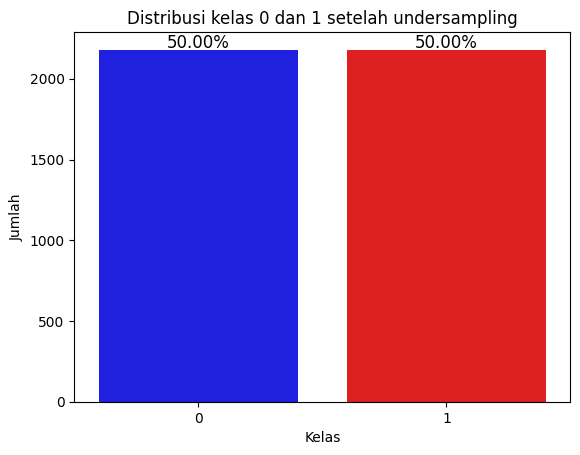

In [9]:
#visualisasi distribusi kelas setelah dilakuakan undersampling

class_distribution = undersampled_data['pencemaran_nama_baik'].value_counts()
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=["blue", "red"])

plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Distribusi kelas 0 dan 1 setelah undersampling')

for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(undersampled_data) * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show

In [10]:
data_train = undersampled_data.copy()

In [11]:
for i in range(10):
  print('>>>>> TEXT #{}'.format(i + 1))
  print(data_train['original_text'].values[i])

>>>>> TEXT #1
walah enak banget dapat pengikut ig cepat di sini panelpediavip.com dan free.panel pedia.net (Hapus Spasi pada Link)
>>>>> TEXT #2
Saya kira umat Islam yg masih mahu kepada khilafah(empayar Islam/pemerintahan muslim) harus sedar gesaan itu tidak berpijak di bumi yg nyata
>>>>> TEXT #3
Sering Kalah.? Yuk Dari Pada Kalah Terus Boleh Untuk Mencoba Keberuntungannya Di Situs Kami SAHABATQQ Ya Bossku .. - Promo Bonus ROLLINGAN 0.3% ( 5 hari sekali )
- Promo Bonus Refferal 15 %
- Bonus Ekstra Refferal 5% ( 1 Bulan Sekali )

Ayo Tunggu Apa lagi Guys.?? Segera Bergabung Bersama Kami Guys.
Untuk info lebih jelas Silahkan hubungi CS kami Yang Online 24jam.!
- Livechat : www,Mejasahabat,net
- Pin BBM Android CS 1: SHBT99
- Pin BBM Blackberry CS 2 : 2AE48042
- Pin BBM Blackberry CS 3 : 2BD6A2E3
- Whatsapp : +85581734021

Buruan Daftar Sekarang Juga Ya... aku tunggu guyss..
Untuk pendaftaran silahkan klik kolom daftar atau link di bawah ini boss 
http://Mejasahabat,net/Register.aspx?la

#Highlight:

1. karakter Tanda baca & emoji
2. format kaskus
3. Slang words
4. URL
5. uppercase & lowercase
6. whitespace/spasi berlebihan

#Preprocessing data berdasarkan explorasi data yang telah dilakukan agar menjadi data yang berkualitas untuk dilakukan modelling

Menghapus mention username

In [12]:
#Membuat fungsi untuk Menghapus mention username
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt

In [13]:
#Menghapus @user
data_train['original_text'] = np.vectorize(remove_pattern)(data_train['original_text'], "@[\w]*")

Perlakukan terhadap emoji:

1. Menghapus emoji
2. translate karakter yang merepresentasikan emoji

1. Menghapus emoji

In [14]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.2 MB/s eta 0:00:00


In [15]:
import demoji

# Mengunduh konfigurasi emoji pertama kali
demoji.download_codes()

# Fungsi untuk menghapus emoji
def remove_emoji(text):
    return demoji.replace(text, '')

# Menerapkan fungsi remove_emoji pada kolom 'original_text'
data_train['original_text'] = data_train['original_text'].apply(remove_emoji)

<ipython-input-15-d4247cc136d8>:4: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


2. Translate emoticon

In [16]:
# Translate emoticon
url_emoticon_trans = 'https://raw.githubusercontent.com/ahmadizzan/netifier/master/data/external/emoticon.txt'
response_emoticon = requests.get(url_emoticon_trans)

emoticon_df = pd.read_csv(io.StringIO(response_emoticon.text), sep='\t', header=None)
emoticon_dict = dict(zip(emoticon_df[0], emoticon_df[1]))

In [17]:
#Membuat fungsi untuk translate emoticon

def translate_emoticon(t):
    for w, v in emoticon_dict.items():
        pattern = re.compile(re.escape(w))
        match = re.search(pattern,t)
        if match:
            t = re.sub(pattern,v,t)
    return t

In [18]:
#Translate emoticon

data_train['original_text'] = data_train['original_text'].apply(translate_emoticon)

Menghapus format bawaan dari Kaskus

In [19]:
#Membuat fungsi untuk menghapus format Kaskus
def remove_kaskus_formatting(text):
    text = re.sub('\[', ' [', text)
    text = re.sub('\]', '] ', text)
    text = re.sub('\[quote[^ ]*\].*?\[\/quote\]', ' ', text)
    text = re.sub('\[[^ ]*\]', ' ', text)
    text = re.sub('&quot;', ' ', text)
    return text

In [20]:
#Menghapus format dari kaskus

data_train['original_text'] = data_train['original_text'].apply(remove_kaskus_formatting)

Menghapus karakter khusus

In [21]:
#Membuat fungsi untuk menghapus karakter dan mengembalikan teksnya menjadi lowercase semua

def clean_caracter(text):
    text = re.sub(r'\n', '', text)
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    return text.lower()

In [22]:
data_train['original_text'] = data_train['original_text'].apply(clean_caracter)

Menerjemahkan Slang Words agar dapat direpresentasikan sesuai kata sesungguhnya

In [23]:
url_slang_words = 'https://raw.githubusercontent.com/ahmadizzan/netifier/master/data/external/slangword.csv'
response_slang_words = requests.get(url_slang_words)
slang_words = pd.read_csv(io.StringIO(response_slang_words.text))
slang_dict = dict(zip(slang_words['original'],slang_words['translated']))

slang_words.head()

,original,translated
0,7an,tujuan
1,@,di
2,ababil,abg labil
3,abis,habis
4,acc,accord


In [24]:
#Membuat fungsi untuk menerjemahkan slang words

def transform_slang_words(text):
    word_list = text.split()
    word_list_len = len(word_list)
    transformed_word_list = []
    i = 0
    while i < word_list_len:
        if (i + 1) < word_list_len:
            two_words = ' '.join(word_list[i:i+2])
            if two_words in slang_dict:
                transformed_word_list.append(slang_dict[two_words])
                i += 2
                continue
        transformed_word_list.append(slang_dict.get(word_list[i], word_list[i]))
        i += 1
    return ' '.join(transformed_word_list)

In [25]:
data_train['original_text'] = data_train['original_text'].apply(transform_slang_words)

Menghapus URL

In [26]:
#Membuat fungsi untuk menghapus URL

def remove_url(text):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)

In [27]:
data_train['original_text'] = data_train['original_text'].apply(remove_url)

Menghapus spasi berlebih

In [28]:
#Membuat fungsi untuk menghapus spasi berlebih

def remove_whitespace(tweet):
  return ' '. join(tweet.split())

In [29]:
data_train['original_text'] = data_train['original_text'].apply(remove_whitespace)

Menghapus non alfabet

In [30]:
#Fungsi untuk menghapus non alfabet

def remove_non_alphabet(text):
    output = re.sub('[^a-zA-Z ]+', '', text)
    return output

In [31]:
data_train['original_text'] = data_train['original_text'].apply(remove_non_alphabet)

Menghapus karakter berulang

In [32]:
#Fungsi untuk menghapus karakter berulang

def remove_repeating_characters(text):
    return ''.join(''.join(s)[:1] for _, s in itertools.groupby(text))

In [33]:
data_train['original_text'] = data_train['original_text'].apply(remove_repeating_characters)

In [34]:
for i in range(10):
  print('>>>>> TEXT #{}'.format(i + 1))
  print(data_train['original_text'].values[i])

>>>>> TEXT #1
walah enak sekali dapat pengikut instagram cepat di sini panelpediavip com dan gratis panel pedia net hapus spasi pada link
>>>>> TEXT #2
saya kira umat islam yang masih mahu kepada khilafah empayar islam pemerintahan muslim harus sedar gesan itu tidak berpijak di bumi yang nyata
>>>>> TEXT #3
sering kalah ayo daripada kalah terus boleh untuk mencoba keberuntunganya di situs kami sahabatq iya bosku promo bonus rolingan hari sekali promo bonus referal bonus ekstra referal bulan sekali ayo tungu apa lagi temanteman segera bergabung bersama kami temanteman untuk informasi lebih jelas silakan hubungi customer service kami yang daring jam livechat w mejasahabat net pin bahan bakar minyak android customer service shbt pin bahan bakar minyak blackbery customer service ae pin bahan bakar minyak blackbery customer service bdae whatsap buruan daftar sekarang juga iya aku tungu guys untuk pendaftaran silakan klik kolom daftar atau link di bawah ini bos
>>>>> TEXT #4
ya rudalnya tan 

Tokenizing : untuk mengubah kalimat menjadi token.Langkah ini dilakukan agar model mampu memahami struktur bahasa dan memungkinkan model untuk bekerja dengan teks dengan lebih efektf

In [35]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

#Membuat fungsi untuk tokenizing
def tokenizing(tweet):
    tokens = word_tokenize(tweet)
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [36]:
data_train['original_text'] = data_train['original_text'].apply(tokenizing)

Stemming : mengubah token menjadi kata dasarnya agar kata-kata yang berbeda yang memiliki akar yang sama dapat dianggap setara.

In [37]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [38]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
  return stemmer.stem(term)

# Melakukan stemming pada semua token di kolom 'original_text'
def stem_all_tokens(dataframe):
    term_base = {}
    for document in dataframe['original_text']:
        for term in document.split():
            if term not in term_base:
                term_base[term] = " "

    for term in term_base:
        term_base[term] = stemmed_wrapper(term)

    dataframe['original_text'] = dataframe['original_text'].apply(lambda x: ' '.join([term_base[word] for word in x.split()]))

    return dataframe

In [39]:
# Panggil fungsi stem_all_tokens dengan DataFrame yang ingin Anda proses
hasil_steem = stem_all_tokens(data_train)

TF - IDF dengan tujuan mengambil informasi untuk mengukur seberapa penting sebuah kata atau frase dalam suatu dokumen terhadap kumpulan dokumen yang lebih besar. Cara kerjanya adalah dengan menghitung bobot kata.

In [41]:
from collections import Counter
import math

# Menghitung Term Frequency (TF) untuk kolom 'original_text'
def calculate_tf(document):
    words = document.split()
    word_count = len(words)
    term_frequency = Counter(words)
    tf = {word: count / word_count for word, count in term_frequency.items()}
    return tf

# Menghitung Inverse Document Frequency (IDF) untuk kolom 'original_text'
def calculate_idf(documents):
    word_to_document_count = {}
    total_documents = len(documents)

    for document in documents:
        words = set(document.split())
        for word in words:
            word_to_document_count[word] = word_to_document_count.get(word, 0) + 1

    idf = {word: math.log(total_documents / count) for word, count in word_to_document_count.items()}
    return idf

# Menghitung TF-IDF untuk kolom 'original_text'
def calculate_tfidf(document, idf):
    tf = calculate_tf(document)
    tfidf = {word: tf[word] * idf[word] for word in tf}
    # Mengembalikan hanya bobot TF-IDF sebagai daftar
    return list(tfidf.values())

In [42]:
# Menghitung IDF
idf = calculate_idf(data_train['original_text'])

# Menghitung TF-IDF untuk setiap dokumen dalam kolom 'original_text'
data_train['tfidf'] = data_train['original_text'].apply(lambda x: calculate_tfidf(x, idf))

# Menampilkan hasil TF-IDF
data_train[['original_text', 'tfidf', 'pencemaran_nama_baik']]

data_train.reset_index(drop=True, inplace=True)
data_train.head()

,original_text,pencemaran_nama_baik,tfidf
0,walah enak sekali dapat ikut instagram cepat d...,0,"[0.338539471195449, 0.20803598155834868, 0.133..."
1,saya kira umat islam yang masih mahu kepada kh...,0,"[0.09768823014549702, 0.19695998846230528, 0.1..."
2,sering kalah ayo daripada kalah terus boleh un...,0,"[0.044289836177616525, 0.08321439262333946, 0...."
3,ya rudal tan pling enk luk kamu dari belkng sm...,0,"[0.15047007196498835, 0.3990584445877657, 0.30..."
4,pihak oposisi bahkan salah perintah karena min...,0,"[0.09148423520372512, 0.29141387396763285, 0.0..."


In [43]:
#Mengubah X menjadi matrix sesuai hasil tf idf

max_features = 5000

# Inisialisasi matriks nol dengan dimensi (jumlah dokumen, max_features)
X = np.zeros((len(data_train['tfidf']), max_features))

# Isi matriks dengan bobot TF-IDF dari daftar bobot
for i, tfidf_list in enumerate(data_train['tfidf']):
    # Ambil maksimal 5000 bobot pertama (kolom pertama)
    X[i, :len(tfidf_list)] = tfidf_list[:max_features]

#Stratch Matematika untuk Algoritma Logistic Regression

ALgoritma logistic regression dipilih dalam project ini sebagai permulaan dalam melatih model sebelum menggunakan Neural Network. Neural Network termasuk dalam deep learning dimana deep learning kerap kali digunakan pada kasus dengan data yang jumlahnya banyak. Sedangkan data yang digunakan dalam project ini memiliki 4+++ baris dimana jumlah ini masih logis jika dieksperimentasi menggunakan algoritma yang lebih sederhana terlebih dahulu seperti Logistic Regression. Selain itu dari sisi teknis, Neural Network kerapkali membutuhkan alat komputasi yang mahal.

In [44]:
class LogisticRegression:
  def __init__(self):
    self._weights = []
    self._learningRate = 0.02
    self._epoch = 10
    self._x = []
    self._y = []

  def linearFunction(self, data):
    return np.dot(data, self._weights)

  def logisticFunction(self, linearResult):
    return 1 / ( 1 + np.exp(-(linearResult)))

  def updateWeights(self, X, y):
    temp = np.zeros(len(X))
    for i in range(len(self._weights)):
      d = (self.logisticFunction(self.linearFunction(X)) - y) * X[i]
      temp[i] = self._weights[i] - (self._learningRate * d)

    return temp

  def logisticRegressionLoss(self, yPredicted, yActual):
    loss = -(yActual * np.log(yPredicted) + (1-yActual) * np.log(1-yPredicted))
    meanLoss = loss.mean()
    return meanLoss

  def logisticRegressionAccuracy(self, yPredicted, yActual):
    yPredicted = yPredicted.round().astype(int)
    xor = yPredicted ^ yActual
    return np.count_nonzero(xor == 0)/len(xor)

  def fit(self, X, y, learningRate, epoch):
    self._x = X
    self._y = y
    self._learningRate = learningRate
    self._epoch = epoch

    featureCount = len(self._x[0])
    self._weights = np.random.rand(featureCount)

    for epoch in range(self._epoch):
      listResult = []

      for i in range(len(self._x)):
        listResult.append(self.logisticFunction(self.linearFunction(self._x[i])))
        self._weights = self.updateWeights(self._x[i], self._y[i])

      print("epoch: ", epoch + 1,
            "\tloss: ", self.logisticRegressionLoss(np.asarray(listResult), y),
            "\taccuracy: ", self.logisticRegressionAccuracy(np.asarray(listResult), y)
      )

  def predict(self, X):
    X = np.array(X)
    if X.ndim == 2:
        listResult = []
        for i in range(len(X)):
            listResult.append(self.logisticFunction(self.linearFunction(X[i])))
        return listResult
    else:
        raise ValueError("Got array in dimension of " + str(X.ndim) + ", expecting array in a dimension of 2.")

In [45]:
# Persiapan Data
X = X
y = data_train['pencemaran_nama_baik']

Melatih model

- Pemilihan nilai learning rate = 0.1 dilakukan karena semakin rendah nilai learning rate, maka semakin kecil kontribusi pada setiap iterasi bagi model dan semakin lambat waktu pelatihan model, namun juga dapat meningkatkan akurasi model. Oleh karena itu, dipilih learning rate 0.2 sebagai nilai cut off awal.

- Pemilihan nilai epoch = 10 dilakukan untuk melihat gambaran awal bagaimana model belajar, apakah tingkat konvergensi dicapai pada nilai epoch ini atau tidak.

In [46]:
# Membuat Objek Model Regresi Logistik
model = LogisticRegression()

# Melatih Model
learningRate = 0.02
epoch = 10
model.fit(X, y, learningRate, epoch)

epoch:  1 	loss:  0.4057833830418769 	accuracy:  0.8217889908256881
epoch:  2 	loss:  0.44231856937289876 	accuracy:  0.810091743119266
epoch:  3 	loss:  0.43551724134469627 	accuracy:  0.8130733944954128
epoch:  4 	loss:  0.4313458973745766 	accuracy:  0.8151376146788991
epoch:  5 	loss:  0.428611952473031 	accuracy:  0.8174311926605504
epoch:  6 	loss:  0.4266800070563249 	accuracy:  0.8204128440366972
epoch:  7 	loss:  0.42524042187714206 	accuracy:  0.8236238532110092
epoch:  8 	loss:  0.4241265559275957 	accuracy:  0.8247706422018348
epoch:  9 	loss:  0.4232401813060422 	accuracy:  0.8268348623853211
epoch:  10 	loss:  0.4225190253149113 	accuracy:  0.8275229357798165


Menyimpan model

In [47]:
with open('model_klasifikasi_sentimen_New.pkl', 'wb') as file:
    pickle.dump(model, file)

#Predict Data

In [40]:
data = {'original_text': ['47367saya kira    @ umat islam yang masih mahu kepada khilafah empayar islam perintah muslim harus dar gesan itu tidak pijak di bumi yang nyata', 'oposisi __=0bahkan salah perintah karena minta saham persen']}
df = pd.DataFrame(data)

,original_text
0,47367saya kira @ umat islam yang masih mahu...
1,oposisi __=0bahkan salah perintah karena minta...


In [48]:
#Preprocess data

df['original_text'] = np.vectorize(remove_pattern)(df['original_text'], "@[\w]*")
df['original_text'] = df['original_text'].apply(remove_emoji)
df['original_text'] = df['original_text'].apply(translate_emoticon)
df['original_text'] = df['original_text'].apply(remove_kaskus_formatting)
df['original_text'] = df['original_text'].apply(clean_caracter)
df['original_text'] = df['original_text'].apply(transform_slang_words)
df['original_text'] = df['original_text'].apply(remove_url)
df['original_text'] = df['original_text'].str.lower()
df['original_text'] = df['original_text'].apply(remove_whitespace)
df['original_text'] = df['original_text'].apply(remove_non_alphabet)
df['original_text'] = df['original_text'].apply(remove_repeating_characters)
df['original_text'] = df['original_text'].apply(tokenizing)
hasil_steem = stem_all_tokens(df)
hasil_steem

,original_text
0,saya kira umat islam yang masih mahu kepada kh...
1,oposisi bahkan salah perintah karena minta sah...


In [49]:
df['tfidf'] = df['original_text'].apply(lambda x: calculate_tfidf(x, idf))
df[['original_text', 'tfidf']]

,original_text,tfidf
0,saya kira umat islam yang masih mahu kepada kh...,"[0.09768823014549702, 0.19695998846230528, 0.1..."
1,oposisi bahkan salah perintah karena minta sah...,"[0.8742416219028987, 0.36940966485770965, 0.38..."


In [50]:
max_features = 5000
X_test = np.zeros((len(df['tfidf']), max_features))
for i, tfidf_list in enumerate(df['tfidf']):
    X_test[i, :len(tfidf_list)] = tfidf_list[:max_features]

In [51]:
pred_text = model.predict(X_test)
threshold = 0.5
pred_text = ["Ya, ini pencemaran nama baik!!" if score > threshold else "Bukan, ini tidak termasuk dalam pencemaran nama baik :)" for score in pred_text]
print(pred_text)

['Ya, ini pencemaran nama baik!!', 'Ya, ini pencemaran nama baik!!']
